### How to run Metrcs on DDF or areas that are outside WFD and DDF

In [9]:
import os
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# To calculate metrics with MAF
import lsst.sims.maf.db as db
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

In [11]:
# import convenience functions
from opsimUtils import *

### ProposalId
To run metrics on DDF or areas outside DDF and WFD, we need to set the `proposalId` in the sql contraint. In short, if running metric on DDFs only, `proposalId > 1`; if running metrics in areas outside DDF and WDF, `proposalId = 0`. We get all also run WFD only metrics using `proposalId = 1`, but a more sophisticated methods is shown in [wfdFootPrint.ipynb](./wfdFootPrint.ipynb). More discussion regarding running metrics on WFD observations only can be found in this [thread](https://community.lsst.org/t/wfd-metrics-with-the-fbs-output/3970).

The area associated with each `proposalId` for one particular cadence simulation is shown below:  
```sql
proposalId  proposalName  proposalType
----------  ------------  ------------
0           Other         Other
1           WFD           WFD
2           DD:COSMOS     DD
3           DD:ECDFS      DD
4           DD:290        DD
5           DD:XMM-LSS    DD
6           DD:ELAISS1    DD
```

#### **Important:** 
The assignment of a proposal ID to a DDF field is **NOT** consistent across all opsims. Meaning that, 'proposalId = 2' may point to the 'COSMOS' field in opsim A, but point to the 'XMM-LSS' field in opsim B. So we wrote a convenience function (`ddfInfo`) to get that information from the opsim databases, where a opsim database object and the name of the DDF field ('COSMOS', 'ECDFS', '290', 'XMM-LSS' or 'ELAISS1') should be provided. 

Next, we demonstrat how to run metrics on DDF only and on areas outside DDF and WFD.

In [12]:
# specify path to the opsim database and create database object
dbfile = '/home/idies/workspace/lsst_cadence/FBS_1.7/baseline_nexp1_v1.7_10yrs.db'
outDir = '../tmp/'
opsdb = db.OpsimDatabase(dbfile)

Use `ddfInfo` to get associated `proposalId` for each DDF field

In [13]:
ddfInfo(opsdb, 'COSMOS')

{'proposalId': 4, 'Coord': (150.1, 2.18)}

In [16]:
# Let's count the visits .. 
metric = metrics.CountMetric('night', metricName='nvisits')
slicer = slicers.HealpixSlicer(nside=64)
constraint = 'filter = "r"'

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


### 1. Compute Metrics on DDF only

In [17]:
# specify proposal ID use compute metric on DDF only
ddf_constraint = constraint + ' and proposalId > 1'

# create metric Bundle
ddf_bundle = mb.MetricBundle(metric, slicer, ddf_constraint, metadata='DDF only')

In [18]:
ddf_g = mb.MetricBundleGroup({'0': ddf_bundle}, opsdb, outDir=outDir)
ddf_g.runAll()
ddf_g.plotAll(closefigs=False, savefig=False)

Querying database SummaryAllProps with constraint filter = "r" and proposalId > 1 for columns ['fieldDec', 'fieldRA', 'night']
Found 23723 visits
Running:  ['0']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and proposalId > 1" constraint now.


/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-linux-x86_64.egg/healpy/projaxes.py:178: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  vmin=vmin,vmax=vmax,**kwds)


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

<Figure size 432x288 with 1 Axes>

### 2. Compute Metrics on areas outside DDF and WFD

In [17]:
# specify proposal ID use compute metric on DDF only
other_constraint = constraint + ' and proposalId = 0'

# create metric Bundle
other_bundle = mb.MetricBundle(metric, slicer, other_constraint, metadata='Other')

Querying database SummaryAllProps with constraint filter = "g" and proposalId = 0 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 32672 visits
Running:  ['0']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" and proposalId = 0" constraint now.
monopole: 30.5516  dipole: lon: 92.6507, lat: -34.5725, amp: 6.18194
Plotting complete.


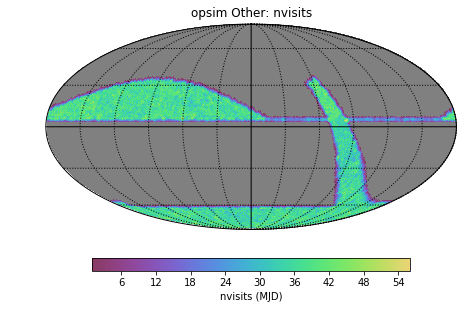

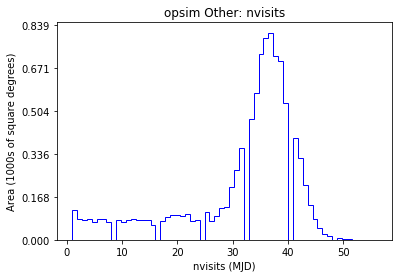

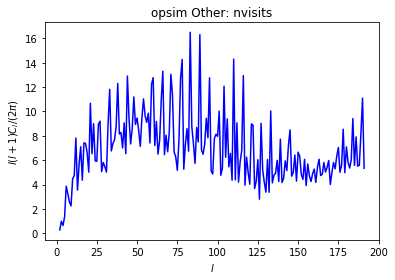

In [18]:
other_g = mb.MetricBundleGroup({'0': other_bundle}, opsdb, outDir=outDir)
other_g.runAll()
other_g.plotAll(closefigs=False, savefig=False)